# Video Games Success Evaluation and Analyses for Online Store

## Tasks

- To identify patterns that determine whether a game succeeds or not. 

- Spot potential big winners to plan advertising campaigns. 

- Prepare the report for the online store Ice.

## Hypotheses

1. Average user ratings of the Xbox One and PC platforms are the same.

2. Average user ratings for the Action and Sports genres are different.

## Data Description

The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

- Name

- Platform

- Year_of_Release

- Genre

- NA_sales (North American sales in USD million)

- EU_sales (sales in Europe in USD million)

- JP_sales (sales in Japan in USD million)

- Other_sales (sales in other countries in USD million)

- Critic_Score (maximum of 100)

- User_Score (maximum of 10)

- Rating (ESRB) legend: 
                - E: everyone
                - E10+: everyone (10+)
                - T: teen
                - M: mature (17+)
                - AO: adults only (18+)
                - RT: rating pending


## Importing Libraries

In [1]:
# Importing pandas
import pandas as pd

# Importing nampy
import numpy as np

# Importing scipy
import scipy
from scipy import stats as st

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

# Importing Sidetable
! python -m pip install sidetable
import sidetable as stb

# Disabling warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

print("Setup Complete")

Setup Complete


## Importing Data

In [2]:
# Uploading DataFrame
data = pd.read_csv('/datasets/games.csv')

In [3]:
# Displaying sample of top 5 rows
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Displaying sample of bottom 5 rows 
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
# Displaying sample of randomly selected rows
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8085,Tokyo Xtreme Racer DRIFT,PS2,2003.0,Racing,0.09,0.07,0.00,0.02,59.0,8.6,E
11563,Yuu Yuu Hakusho: Makyo Toitsusen,GEN,1994.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN
13873,Dead Rising,PS4,2016.0,Action,0.02,0.00,0.01,0.01,78.0,6.6,M
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP
5273,Kinectimals: Now with Bears!,X360,2011.0,Misc,0.27,0.06,0.00,0.03,NaN,NaN,NaN
15816,Without Warning,XB,NaN,Shooter,0.01,0.00,0.00,0.00,45.0,2,M
13742,Breeding Stud 2,PS,1998.0,Sports,0.00,0.00,0.04,0.00,NaN,NaN,NaN
10870,Chess,PS,2001.0,Strategy,0.05,0.04,0.00,0.01,NaN,NaN,NaN
2062,1942,NES,1985.0,Shooter,0.65,0.14,0.21,0.00,NaN,NaN,NaN
14112,Macross ? Scramble,PSV,2016.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN


### Exploring Data

In [6]:
# Looking at general data description
data.describe().T.astype(float)

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [7]:
# Looking at general data description for columns with object values
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [8]:
# Displaying the general DataFrame information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
# Checking the general number of missing values
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [10]:
# Checking the duplicates
data.duplicated().sum()

0

***Conclusion***

- The initial DataFrame conteins 16715 rows in 11 columns.

- We observ 'NaN' values in the last three columns. According to DataFrame info we have also missing data in the 'Name', 'Genre' and 'Year_of_Release' columns.

- DataFrame conteins no duplicated values.

- Columns must be renamed to lowercase.

- Critic_Score and Year_of_Release datatypes must be changed to integers

- User_Score has tbd (to be determind) values, numeric values must be changed to float.

## Data Preprocessing

### Naming DataFrame Columns 

In [11]:
# Changing columns names to lowercase
data.columns = data.columns.str.lower()

# Checking the result
data.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Treating missing values

We must take a closer look at the missing values and to raplase or minimize them whrere it is critical and technically possible.


In [12]:
# Studying the missing values info 
data.stb.missing(clip_0=True, style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%


#### Name and Genre Columns

In [13]:
# Displaying the the two rows with missing values in columns 'name and 'genre'
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The two rows (out of almost 17K) have missing values in both name and genere columns. We can see NaN values (abandoned or not rated) in score columns and some zero values in sales columns. Considering the low signifivance of unknown games on the old (1993) platforms, we can delet those two rows without impact on furher analyses. 

In [14]:
# Deleting the rows from the DataFrame
data = data.dropna(subset=['name'], axis=0)

In [15]:
# Checking the new list of columns with missing values
data.stb.missing(clip_0=True, style=True)

,missing,total,percent
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
user_score,"6,699","16,713",40.08%
year_of_release,269,"16,713",1.61%


***Section conclusion:***
We've minimized the columns with missing values to four and lost only 2 rows, whic is a good deal.

#### Year of Release Column

In [16]:
# Displaying the DataFrame sample of rows with missing 'year_of_release'
data[data['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


There is a significant volume of missing year of release data, which is very important for further analyses, thus the meaningfull fill-in values with at least close to actual year of game release is our only option. We'll calculate the avarage year of release based on the year of release of the games on the same platforms.

In [17]:
# Fillin-in the missing 'year_of_release' with avarage year based on the platform name
data['year_of_release'] = data['year_of_release'].fillna(data.groupby(['platform'])['year_of_release'].transform('mean'))

In [18]:
# Checking the missing values in the 'yerar_of_release' column
data['year_of_release'].isnull().sum()

0

In [19]:
# Chanching datatype in 'year_of_release' into integer
data['year_of_release'] = np.floor(data['year_of_release']).astype(int)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


***Section conclusion:***
We've filled in the missing data in year of game release column with years of actual or very close to actual year of release for the particular platforms. We've checked several of them using the web resources to confirmed the fairness of this operation.

#### User Score and Critic Score Columns

In [20]:
# Displaying the unique values in 'user_score' column
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
# Checking the number of 'tbd' values in the column grouped by the year of release
data[data.user_score == 'tbd']['year_of_release'].value_counts(sort=False)

1998      1
2000     43
2002    192
2004    111
2006    124
2008    355
2010    331
2012     24
2014     21
2016     34
1997      1
1999      8
2001     82
2003    106
2005    121
2007    192
2009    406
2011    217
2013     17
2015     38
Name: year_of_release, dtype: int64

Except of the NaN values we can also observe the 'tbd' (to be determined) values. We can see the large number of them distributed among many years from 1998 to 2015. The reason of their existance could be that data entry officials left the space with TBD note for self to fill in this space with actual data as soon as it will be obtained. But as we can see those notes were abandoned and remain in the DataFrame as is. There is no technical way to determine tham now and guess is the worst way, thus they must be replaced with NaN values to avoid interference with further arythmetical calculations and analyses.

In [22]:
# Changing 'tbd' values to NaN
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [23]:
# Changing datatype in 'user_score' from object to float
data['user_score'] = data['user_score'].astype(float)

In [24]:
# Checking correlation between the two score columns
data['user_score'].corr(data['critic_score'])

0.5808778320767237

The correlation between the data in user score and critic score is not high enough to use the method of mutual replacing the missing values within both columns. Furthermore, common logic and intuition tells us that user score in many cases can be a product of critic score which published earlier. So, even if correclation was higher, the data exchange between the columns would not be a professional solution. We must continue further analyses with the existing volume of NaN values.

In [25]:
# Checking the missing values rate after replacing 'tbd' to 'NaN' 
data.stb.missing(clip_0=True, style=True)

,missing,total,percent
user_score,"9,123","16,713",54.59%
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%


***Section conclusion:***
We've identified and filled in the 'tbd' values in user score ith NaN (having no other good optins of replacement), the percentage of the missing values in user score slightly increased.

#### Rating Column

In [26]:
# Displaying the unique values of ESRB rating
data.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

We've learned from the external sourses the brief history of ESRB ratings evolution. In 2016 we have active ratings set as follows: 
- E: everyone
- E10+: everyone (10+)
- T: teen
- M: mature (17+)
- AO: adults only (18+)
- RP: rating pending

The rating "K-A" (known as Kids to Adults) was in use until 1998. Modern ESRB rating system equivalent is "E10+".

The rating "EC" (known as Early Childhood) has content that may be suitable for persons ages 3 and older.Thus the modern equivalent could be "E". 

So, in order to minimize the number of rating categories, we can replace them with their appropriate equivalents.

In [27]:
# Replacing outdated values with its relevant equivalent
data['rating'] = data['rating'].where(data['rating'] != "K-A", 'E10+')

In [28]:
# Replacing outdated values with its relevant equivalent
data['rating'] = data['rating'].where(data['rating'] != "EC", 'E')

In [29]:
# Checking the replacement result
data.rating.value_counts()

E       3998
T       2961
M       1563
E10+    1423
RP         3
AO         1
Name: rating, dtype: int64

In [30]:
# Checking the quantity of NaN values in the row
data.rating.isna().sum()

6764

It is recommended to replace the missing values in this particualr column with any placeholder, in order to use this data as well in further analyses. Therefore we are replacing NaN with definition NA (not avaialable). 

In [31]:
# Replacing NaN values with placeholder 'unknown'
data['rating'] = data['rating'].fillna('unknown')

In [32]:
# Checking the result
data.rating.isna().sum()

0

***Section conclusion:***
The number of rating categories reduced from 8 to 6. We cant replace the rating 'RP" (stands for Rating Pending") without guessing, so it will stay as is. We've replaced missing data with placeholder 'unknown' to use it in further analyses.

### Calculating Total Sales

In [33]:
# Assigning the calculation of total sales to new column
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [34]:
# Checking the result
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [35]:
# Displaying the enriched DataFrame detailes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


***Intermediate Conclusion:***
We arrived ready for EDA stage with the DataFrame of 16713 rows in 12 columns. The missing values (without replacement options) remain only in scores and rating columns. Total sales column has been added to the initial DataFrame.

## Explaratory Data Analyses (EDA)

### Dynemics of games release per years

In [36]:
# Grouping games 'name' with year of release, saving result in the new dataset 
df_g = data.groupby(['year_of_release'])['name'].nunique().reset_index().sort_values(by='year_of_release')

In [37]:
df_g.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14


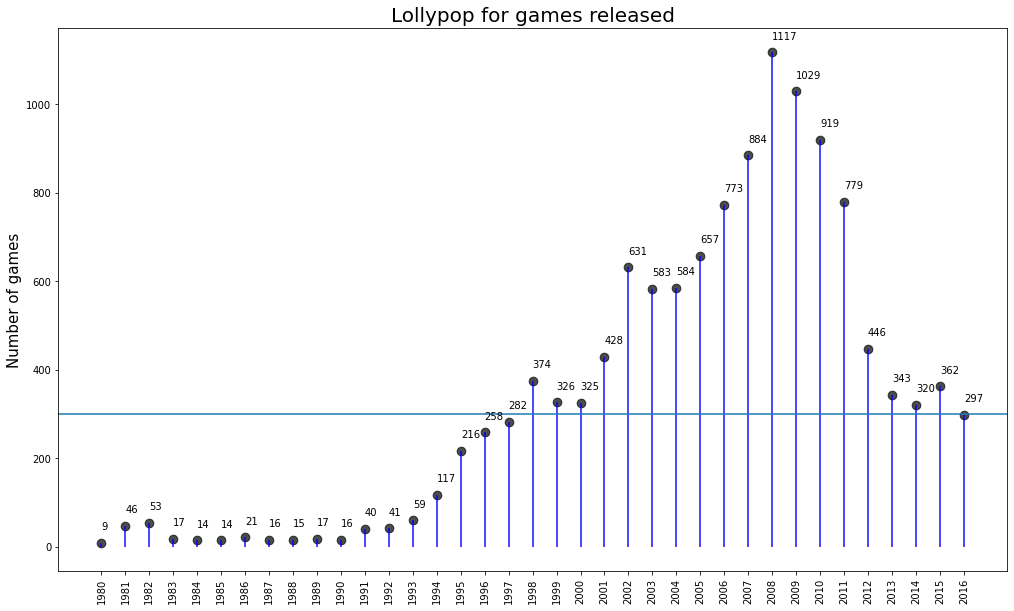

In [38]:
# Creating canvas for future graph
fig, ax =plt.subplots(figsize=(17,10))

# Defining vertical lines
ax.vlines(x=df_g.year_of_release, ymin=0, ymax=df_g.name, color='blue', alpha=0.7, linewidth=2)

# Assigning top dots
ax.scatter(x=df_g.year_of_release, y=df_g.name, s=75, color='black', alpha=0.7)

# Assigning title and labels
ax.set_title("Lollypop for games released", fontdict={'size':20})
ax.set_ylabel("Number of games", fontdict={'size':15})
ax.set_xticks(df_g.year_of_release)
ax.set_xticklabels(df_g.year_of_release, rotation=90)
ax.axhline(y=300)

for row in df_g.itertuples():
    ax.text(row.year_of_release, row.name+30, s=row.name) 
plt.show()

***Graph observations:***
The number of games released in 20th century (prior 2002) is insignificant. We'll not be taking them into consideration for further prognoses for 2017. Overall the most games in the dataset relesed around 2007-2011. 

### Variation of sales per platform

In [39]:
# Grouping data of sales per platform and saving the result in new dataset
df_p_sales = data[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()

In [40]:
df_p_sales.head()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42


For displaying of data destribution, we are calculating "zero sales" - the diffrenece between total sales and total sales average devided by total sales standard destribution value.

In [41]:
# Calculating "zero sales" 
df_p_sales['zero_sales'] = (df_p_sales['total_sales']-df_p_sales['total_sales']
.mean())/df_p_sales['total_sales'].std()

In [42]:
df_p_sales.head()

,platform,total_sales,zero_sales
0,PCFX,0.03,-0.825614
1,GG,0.04,-0.825586
2,3DO,0.10,-0.825413
3,TG16,0.16,-0.825241
4,WS,1.42,-0.821623


For graphycal presentation of the "zero sales" data, we're assigning colors to the positive and negative values.

In [43]:
# Assigning colors to zero sales values
df_p_sales['color'] = ['blue' if x<0 else 'green' for x in df_p_sales['zero_sales']]

In [44]:
# Checking the result
df_p_sales

,platform,total_sales,zero_sales,color
0,PCFX,0.03,-0.825614,blue
1,GG,0.04,-0.825586,blue
2,3DO,0.10,-0.825413,blue
3,TG16,0.16,-0.825241,blue
4,WS,1.42,-0.821623,blue
5,NG,1.44,-0.821565,blue
6,SCD,1.86,-0.820359,blue
7,DC,15.95,-0.779896,blue
8,GEN,28.35,-0.744287,blue
9,SAT,33.59,-0.729239,blue


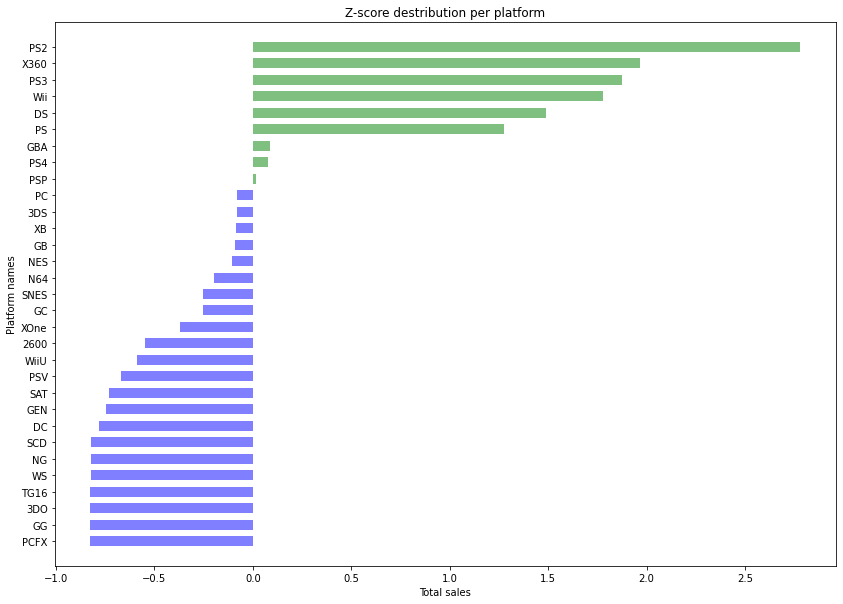

In [45]:
plt.figure(figsize=(14,10)) #Creating the canvas
# Assigning data and limits to the graph axeses
plt.hlines(df_p_sales.platform, xmax=df_p_sales['zero_sales'], xmin=0, color=df_p_sales.color, alpha=0.5, linewidth=10) 
# Titling the graph
plt.title("Z-score destribution per platform")
plt.xlabel('Total sales')
plt.ylabel('Platform names')
plt.show()

***Graph observation:***
Z-score is also known as standard score gives us an idea of how far a data point is from the mean. It indicates how many standard deviations an element is from the mean. Hence, Z-Score is measured in terms of standard deviation from the mean. A higher positive Z-score for a platform the better platform position on the sales market. This indicates that platforms producers Play Station Co. (all modifications), XBox Co. with its X360 and Nintendo with its Wii are doing well and prospere.

Text(0.5, 1.0, 'Platform sales lifespan')

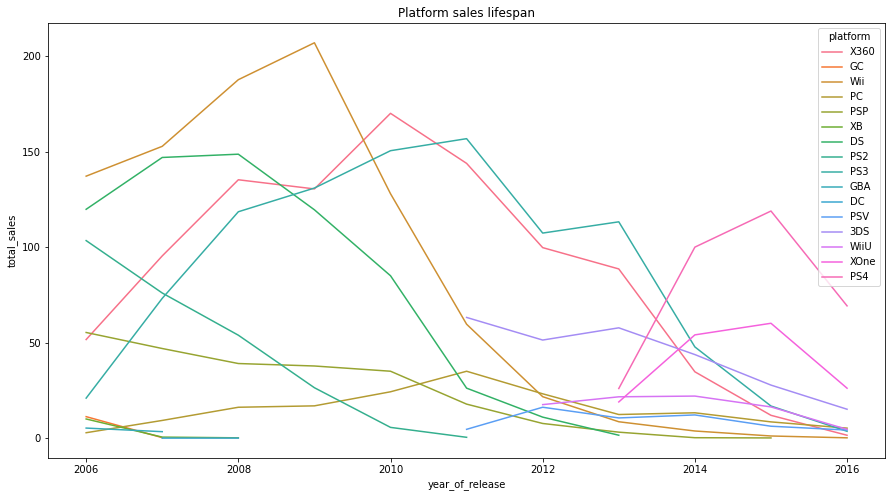

In [46]:
# Setting the time limit for further analysis of successful platforms (last 10 years)
df_p_sales_life = data[data.year_of_release >= 2006]

# Grouping data of total sales of platforms combbined with their year of release
df_p_sales_life = df_p_sales_life.groupby(
    ['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

# Plotting the graph of the platforms market lifespan 
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_p_sales_life, x='year_of_release', y='total_sales', hue='platform')
plt.title("Platform sales lifespan")

***Graph observation:***
The graph picture shows the maximum lifespan of the platform is never over 10 years and there was a significat switch around 2014. Probably the impact was from the the technological revolution in video graphics, release of mobile game applications. The vast majority of the succesful platforms of 2008-2010 faded away by 2016.

In [47]:
# Setting the time limit (last 5 years) for the new platforms dataset
df_p_life = data.query('year_of_release >= 2011')

In [48]:
# Grouping the platform data with the year of release and aggregating min and max values
df_p_life = df_p_life.groupby(['platform'])['year_of_release'].agg(['min', 'max']).reset_index()
# Adding the age column to the dataset
df_p_life['age'] = df_p_life['max'] - df_p_life['min']

In [49]:
# Displaying the dataset with the long-living platforms on top
df_p_life.sort_values(by='age', ascending=False)

,platform,min,max,age
0,3DS,2011,2016,5
2,PC,2011,2016,5
4,PS3,2011,2016,5
7,PSV,2011,2016,5
8,Wii,2011,2016,5
10,X360,2011,2016,5
6,PSP,2011,2015,4
9,WiiU,2012,2016,4
5,PS4,2013,2016,3
11,XOne,2013,2016,3


***Platform lifespan observation:***
The table is the extra confirmation of the platform lifespan graph. The top platform market "survivors" for the last 5 years (in 2016) are: 3DS, PC, PS3, PSV, Wii and X360.

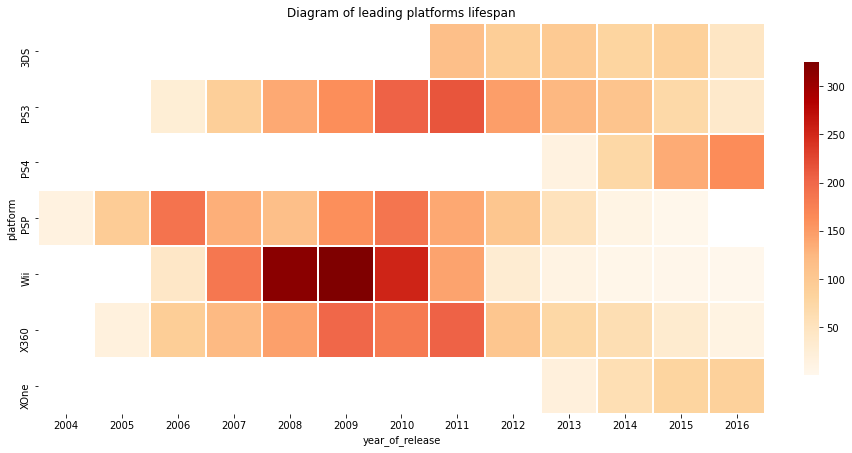

In [50]:
# Grouping data of selected platforms with their year of release
df_p_life = data[data['platform'].isin(['3DS', 'PSP', 'PS4', 'X360', 'PS3', 'Wii', 'XOne'])].groupby(
    ["platform", "year_of_release"]).size().unstack(
)

# Creating heatmap graph to visualize the platform lifespan over the last 10 years
plt.figure(figsize=(14,10))
g = sns.heatmap(df_p_life, square=True, cbar_kws={'fraction': 0.02}, cmap='OrRd', linewidth=1)
plt.title("Diagram of leading platforms lifespan")
plt.show()

***Diagram observation:***
We picked for instance the seven most popular/successful and "long living" platforms for the heatmap diagram.
We observe that the  active (top popularity and saling success) lifespan of the platform is within 5 years maximum.
For the most successful platforms it takes about 2-3 years to appear and reach the top of its popularity, and then another 2-3 years to fade away, giving the way to the other platforms or future modifications of the old platforms. Therefore in 2016, looking at this diagram we can assume for 2017 the further succesfull rise of PS4 and XOne platforms and final disappearance of PS3, Wii and X360 platforms (just like PSP disappeared from the market in 2015).

### Identification of the relevant Data for prognosis

Taking into account the above observations of platforms' saling succeess and lifspan, we decided to use only most relevant time frame of the last 5 years for the year 2017 prognoses.

In [51]:
# Setting the time limit and saving data in the new dataset
data_new = data[data.year_of_release >=2011]

# Displaying the new dataset sample
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60


***Description of the new DataFrame:***
The new dataset is the time-limited slice of the initial DataFrame that we'll be using for all further analyses.

#### Leading Platforms

In [52]:
# Creating the new dataset with games on the platforms grouped with their total sales revenue
df_g_p = data_new.groupby(['platform', 'name'])['total_sales'].sum().reset_index()
df_g_p

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
4025,XOne,XCOM 2,0.04
4026,XOne,ZombiU,0.01
4027,XOne,Zombie Army Trilogy,0.11
4028,XOne,Zoo Tycoon (2013),0.36


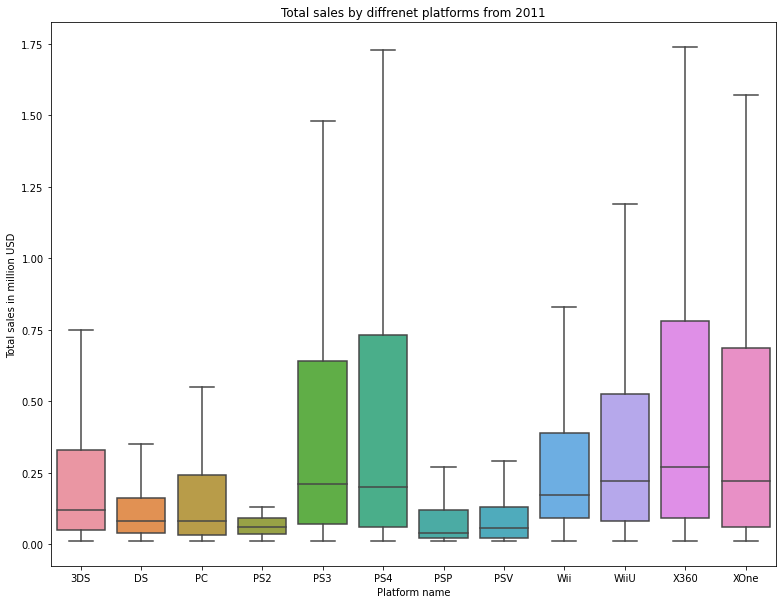

In [53]:
# Creating the boxplot of the platforms in accordance with their revenue
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=df_g_p, showfliers=False)
plt.title("Total sales by diffrenet platforms from 2011")
plt.xlabel('Platform name')
plt.ylabel('Total sales in million USD')
plt.show()

***Graph description:***
Visually the most successful platforms throughout the last 5 years were XOne, X360, Wii, WiiU, PS3, PS4 and 3DS. 

In [54]:
# Grouping platforms data with total sales to see the top successfully sold platforms
df_g_p.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,platform,total_sales
4,PS3,445.57
10,X360,380.38
5,PS4,314.14
0,3DS,259.00
11,XOne,159.32
2,PC,97.68
8,Wii,95.02
9,WiiU,82.19
7,PSV,54.07
1,DS,38.73


***Conclusion:***
We have identified the leaders among the platforms: XOne, X360, Wii, PS3, PS4 and 3DS. Will consider them in further analyses of the leading games.

#### Leading Games

In [55]:
# Selecting top platforms for the new dataset
platform_top = df_g_p.query('platform == ("PS4", "X360", "PS3", "Wii", "3DS", "XOne")').sort_values(
    by='total_sales', ascending=False)
platform_top.head(10)

,platform,name,total_sales
1324,PS3,Grand Theft Auto V,21.05
3460,X360,Grand Theft Auto V,16.27
3343,X360,Call of Duty: Modern Warfare 3,14.73
1853,PS4,Call of Duty: Black Ops 3,14.63
349,3DS,Pokemon X/Pokemon Y,14.60
1176,PS3,Call of Duty: Black Ops II,13.79
3341,X360,Call of Duty: Black Ops II,13.68
1178,PS3,Call of Duty: Modern Warfare 3,13.33
259,3DS,Mario Kart 7,12.65
1942,PS4,Grand Theft Auto V,12.62


***Table observation:***
We can observ few same leading games like Call of Duty series, Grand Theft Auto series on the several different platforms.

In [56]:
platform_top.pivot_table(index='platform', values='total_sales', aggfunc=['median', 'mean'])

,median,mean
,total_sales,total_sales
platform,,
3DS,0.12,0.498077
PS3,0.21,0.630226
PS4,0.20,0.801378
Wii,0.17,0.482335
X360,0.27,0.763815
XOne,0.22,0.645020


***Conclusion:***
In average the most successful games lifted the overall platform leader PS4 closely followed by X360. It is possible to assume that Play Station and XBox developers choose the strategy of adopt as many as possible most popular games to their platforms.

#### Score Influence on Sales

In this section we are going to check how (if at all) the reviewes from users and professional critics influence the reveniews. For instance we are choosing one of the mid-top successful platforms PS3.

In [57]:
# Slicing last 10 years DataFrame for the PS3 platform only 
ps3 = data_new[data_new['platform'] == 'PS3']
ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17


In [58]:
# Displaying the correclation of scores and total sales for PS3 platform
ps3[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.563315,0.380111
user_score,0.563315,1.000000,0.014089
total_sales,0.380111,0.014089,1.000000


There is very week correlation 40% of sales with professional reviews and almost non 6% of sales correlation with user reviews.

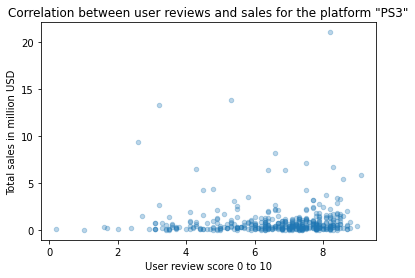

In [59]:
# Creating the scatter plot on correlation between sales and user reviews
ps3.plot.scatter(y='total_sales', x='user_score', alpha=.30)
plt.title('Correlation between user reviews and sales for the platform "PS3"')
plt.xlabel('User review score 0 to 10')
plt.ylabel('Total sales in million USD')
plt.show()

***Graph observation:***
User scors from 1 to 10 data is mostly concentrated between 7 and 9. Users loved PS3 a lot and maid its revenue in total about USD 3M.  

In [60]:
# Calculating the Pearson coefficient for sales connection with user reviews
print('Pearson correlation coefficient between user reviews and sales for PS3 platform: {:.0%}'.format(
    ps3['total_sales'].corr(ps3['user_score'])))

Pearson correlation coefficient between user reviews and sales for PS3 platform: 1%


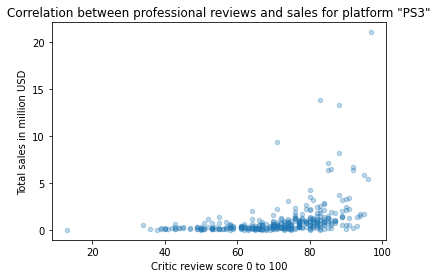

In [61]:
# Creating the scatter plot on correlation between sales and critic reviews
ps3.plot.scatter(y='total_sales', x='critic_score', alpha=.30)
plt.title('Correlation between professional reviews and sales for platform "PS3"')
plt.xlabel('Critic review score 0 to 100')
plt.ylabel('Total sales in million USD')
plt.show()

***Graph observation:***
Professional critic scores from 0 to 100 scorred PS3 games mostly around 70 to 90. The revenue made total around USD 2.5M. 

In [62]:
# Calculating the Pearson coefficient for sales connection with critic reviews
print('Pearson correlation coefficient between professional reviews and sales for PS3 platform: {:.0%}'.format(
    ps3['total_sales'].corr(ps3['critic_score'])))

Pearson correlation coefficient between professional reviews and sales for PS3 platform: 38%


**Section Conclusion:**
Based on the Pearson correlation coefficient and scatter plots destribution pictures, there is almost non linear connection between sales and user reviews. The connection between the sales and professional reviews is quite weak. 

#### Leading  and Profitable Genres

In [63]:
# Crearing table of genre data frequency
data_new.stb.freq(['genre'], style=True, cum_cols=True)

,genre,count,percent,cumulative_count,cumulative_percent
0,Action,"1,270",31.51%,"1,270",31.51%
1,Role-Playing,467,11.59%,"1,737",43.09%
2,Adventure,411,10.20%,"2,148",53.29%
3,Sports,390,9.68%,"2,538",62.96%
4,Misc,375,9.30%,"2,913",72.26%
5,Shooter,330,8.19%,"3,243",80.45%
6,Racing,181,4.49%,"3,424",84.94%
7,Fighting,159,3.94%,"3,583",88.89%
8,Simulation,138,3.42%,"3,721",92.31%
9,Platform,122,3.03%,"3,843",95.34%


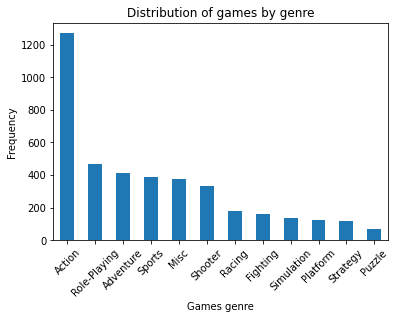

In [64]:
# Creating barplot for visualization of the genre data frequency
data_new.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of games by genre')
plt.xlabel('Games genre')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

***Graph observation:***
Action games are the most popular in this DataFrame. Sports, Role-Playing and Adventure are second popular with almost equal frequency between each other.

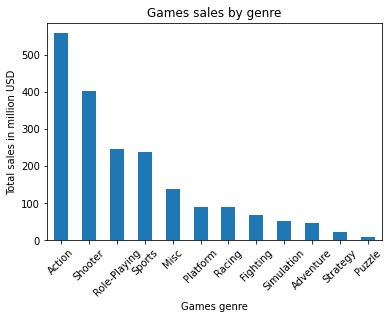

In [65]:
# Creating barplot of genre success in sales
data_new.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Games sales by genre')
plt.xlabel('Games genre')
plt.xticks(rotation=45)
plt.ylabel('Total sales in million USD')
plt.show()

***Graph observation:***
This graph confirms that Action games are also the most profitable for the producing companies. The highes sales show the active games (action, shooter, sports). Calm and intellectual genres like strategy and puzzles are liss proffitable.  

In [66]:
genre_sales_platform = data_new.groupby(['genre', 'platform'])['total_sales'].mean().sort_values(ascending=False).reset_index()
genre_sales_platform.head(10)

,genre,platform,total_sales
0,Racing,WiiU,2.623333
1,Shooter,PS4,2.160000
2,Shooter,XOne,1.587632
3,Shooter,X360,1.478250
4,Racing,3DS,1.360000
5,Shooter,PS3,1.284103
6,Platform,WiiU,1.266471
7,Fighting,WiiU,1.254000
8,Sports,PS4,1.208913
9,Platform,3DS,1.161786


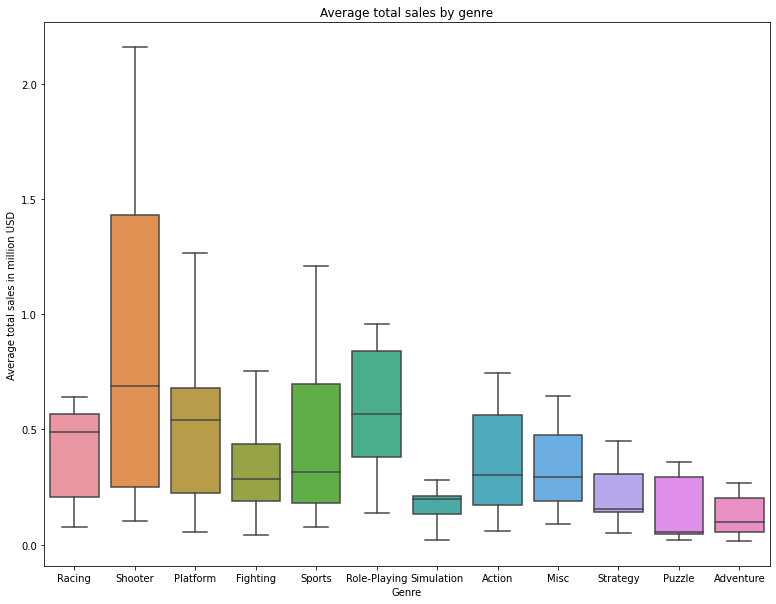

In [67]:
# Creating the boxplot of the genres in accordance with their average revenue
plt.figure(figsize=(13,10))
sns.boxplot(x='genre', y='total_sales', data=genre_sales_platform, showfliers=False)
plt.title("Average total sales by genre")
plt.xlabel('Genre')
plt.ylabel('Average total sales in million USD')
plt.show()


In [68]:
genre_sales_name = data_new.groupby(['genre', 'name'])['total_sales'].mean().sort_values(ascending=False).reset_index()
genre_sales_name.head(10)

,genre,name,total_sales
0,Role-Playing,Pokemon X/Pokemon Y,14.600
1,Racing,Mario Kart 7,12.650
2,Role-Playing,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.680
3,Action,Grand Theft Auto V,11.316
4,Platform,Super Mario 3D Land,10.810
5,Platform,New Super Mario Bros. 2,9.900
6,Shooter,Halo 4,9.710
7,Simulation,Animal Crossing: New Leaf,9.170
8,Role-Playing,Pokemon Black 2/Pokemon White 2,8.060
9,Shooter,Call of Duty: Modern Warfare 3,7.650


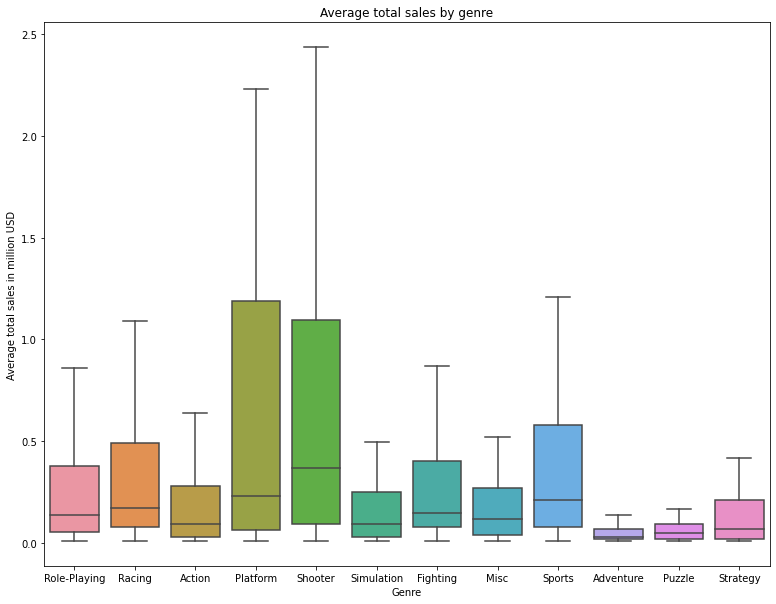

In [69]:
plt.figure(figsize=(13,10))
sns.boxplot(x='genre', y='total_sales', data=genre_sales_name, showfliers=False)
plt.title("Average total sales by genre")
plt.xlabel('Genre')
plt.ylabel('Average total sales in million USD')
plt.show()

### Regional Users' Profile

#### Top Platforms by Region

We are identifying the top 5 successful platforms for 3 diffrenet regions of the world. 

In [70]:
# Identifying top 5 platforms for North America
na_platforms = data_new.pivot_table(index='platform', values='na_sales', aggfunc=['sum']).reset_index()
na_platforms.columns = ['platform', 'na_total_sales']
na_platforms['na_market_share'] = na_platforms['na_total_sales']/(na_platforms['na_total_sales']).sum()
na_platforms = na_platforms.sort_values(by='na_total_sales', ascending=False).reset_index(drop=True)
na_platforms.head()

others_sales = na_platforms.loc[5:, 'na_total_sales'].sum()
others_share = na_platforms.loc[5:, 'na_market_share'].sum()

na_platforms = na_platforms[0:5].append({'platform':'others', 'na_total_sales':others_sales, 'na_market_share' : others_share}, ignore_index=True)
na_platforms

,platform,na_total_sales,na_market_share
0,X360,226.80,0.273019
1,PS3,168.26,0.202550
2,PS4,108.74,0.130900
3,XOne,93.12,0.112097
4,3DS,83.49,0.100504
5,others,150.30,0.180930


In [71]:
# Identifying top 5 platforms for Europian Union
eu_platforms = data_new.pivot_table(index='platform', values='eu_sales', aggfunc=['sum']).reset_index()
eu_platforms.columns = ['platform', 'eu_total_sales']
eu_platforms['eu_market_share'] = eu_platforms['eu_total_sales']/(eu_platforms['eu_total_sales']).sum()
eu_platforms = eu_platforms.sort_values(by='eu_total_sales', ascending=False).reset_index(drop=True)
eu_platforms.head()

others_sales = eu_platforms.loc[5:, 'eu_total_sales'].sum()
others_share = eu_platforms.loc[5:, 'eu_market_share'].sum()

eu_platforms = eu_platforms[0:5].append({'platform':'others', 'eu_total_sales':others_sales, 'eu_market_share' : others_share}, ignore_index=True)
eu_platforms

,platform,eu_total_sales,eu_market_share
0,PS3,163.10,0.243415
1,PS4,141.09,0.210566
2,X360,117.10,0.174763
3,3DS,61.48,0.091754
4,PC,56.70,0.084621
5,others,130.58,0.194881


In [72]:
# Identifying top 5 platforms for Japan
jp_platforms = data_new.pivot_table(index='platform', values='jp_sales', aggfunc=['sum']).reset_index()
jp_platforms.columns = ['platform', 'jp_total_sales']
jp_platforms['jp_market_share'] = jp_platforms['jp_total_sales']/(jp_platforms['jp_total_sales']).sum()
jp_platforms = jp_platforms.sort_values(by='jp_total_sales', ascending=False).reset_index(drop=True)
jp_platforms.head()

others_sales = jp_platforms.loc[5:, 'jp_total_sales'].sum()
others_share = jp_platforms.loc[5:, 'jp_market_share'].sum()

jp_platforms = jp_platforms[0:5].append({'platform':'others', 'jp_total_sales':others_sales, 'jp_market_share' : others_share}, ignore_index=True)
jp_platforms

,platform,jp_total_sales,jp_market_share
0,3DS,100.67,0.409611
1,PS3,49.39,0.200960
2,PSP,24.04,0.097815
3,PSV,21.91,0.089148
4,PS4,15.96,0.064939
5,others,33.80,0.137527


Text(0.5, 1.0, 'Japan')

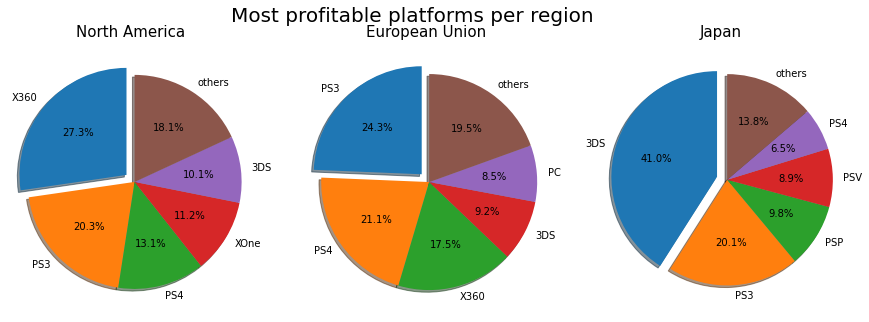

In [73]:
# Plotting 3 pies (ax1, ax2 and ax3) for 3 regions
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) # for 3 canvas

fig.suptitle('Most profitable platforms per region', fontsize=20) # assigning title

# Pie for NA region
labels = na_platforms['platform'] # labling each piece of pie
sizes = na_platforms['na_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') # equal aspect ratio makes pie a circle
ax1.set_title('North America', fontsize=15)

# Pie for EU region
labels = eu_platforms['platform'] # labling each piece of pie
sizes = eu_platforms['eu_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') # equal aspect ratio makes pie a circle
ax2.set_title('European Union', fontsize=15)

# Pie for Japan
labels = jp_platforms['platform'] # labling each piece of pie
sizes = jp_platforms['jp_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal') # equal aspect ratio makes pie a circle
ax3.set_title('Japan', fontsize=15)


***Graphs observation:***
North America and EU voted with their money for X360 of XBox followed by PS3 of Play Station. Nintendo is represented only by Wii. The picture is different in Japan: Nintendo is a champion with its 3DS,  Play Station with its PS3 follows the leader. XBox products went down mixed among the others.

#### Top Genres by Region

In [74]:
# Identifying top 5 genres for North America
na_genres = data_new.pivot_table(index='genre', values='na_sales', aggfunc=['sum']).reset_index()
na_genres.columns = ['genre', 'na_total_sales']
na_genres['na_market_share'] = na_genres['na_total_sales']/(na_genres['na_total_sales']).sum()
na_genres = na_genres.sort_values(by='na_total_sales', ascending=False).reset_index(drop=True)
na_genres.head()

others_sales = na_genres.loc[5:, 'na_total_sales'].sum()
others_share = na_genres.loc[5:, 'na_market_share'].sum()

na_genres = na_genres[0:5].append({'genre':'others', 'na_total_sales':others_sales, 'na_market_share' : others_share}, ignore_index=True)
na_genres

,genre,na_total_sales,na_market_share
0,Action,231.10,0.278196
1,Shooter,194.47,0.234101
2,Sports,108.70,0.130852
3,Role-Playing,83.89,0.100986
4,Misc,69.69,0.083892
5,others,142.86,0.171973


In [75]:
# Identifying top 5 genres for European Union
eu_genres = data_new.pivot_table(index='genre', values='eu_sales', aggfunc=['sum']).reset_index()
eu_genres.columns = ['genre', 'eu_total_sales']
eu_genres['eu_market_share'] = eu_genres['eu_total_sales']/(eu_genres['eu_total_sales']).sum()
eu_genres = eu_genres.sort_values(by='eu_total_sales', ascending=False).reset_index(drop=True)
eu_genres.head()

others_sales = eu_genres.loc[5:, 'eu_total_sales'].sum()
others_share = eu_genres.loc[5:, 'eu_market_share'].sum()

eu_genres = eu_genres[0:5].append({'genre':'others', 'eu_total_sales':others_sales, 'eu_market_share' : others_share}, ignore_index=True)
eu_genres

,genre,eu_total_sales,eu_market_share
0,Action,199.31,0.297455
1,Shooter,148.04,0.220939
2,Sports,88.48,0.132050
3,Role-Playing,62.35,0.093053
4,Racing,40.58,0.060563
5,others,131.29,0.195941


In [76]:
# Identifying top 5 genres for Japan
jp_genres = data_new.pivot_table(index='genre', values='jp_sales', aggfunc=['sum']).reset_index()
jp_genres.columns = ['genre', 'jp_total_sales']
jp_genres['jp_market_share'] = jp_genres['jp_total_sales']/(jp_genres['jp_total_sales']).sum()
jp_genres = jp_genres.sort_values(by='jp_total_sales', ascending=False).reset_index(drop=True)
jp_genres.head()

others_sales = jp_genres.loc[5:, 'jp_total_sales'].sum()
others_share = jp_genres.loc[5:, 'jp_market_share'].sum()

jp_genres = jp_genres[0:5].append({'genre':'others', 'jp_total_sales':others_sales, 'jp_market_share' : others_share}, ignore_index=True)
jp_genres

,genre,jp_total_sales,jp_market_share
0,Role-Playing,79.97,0.325386
1,Action,63.62,0.258860
2,Misc,17.60,0.071612
3,Fighting,12.38,0.050372
4,Platform,12.13,0.049355
5,others,60.07,0.244416


Text(0.5, 1.0, 'Japan')

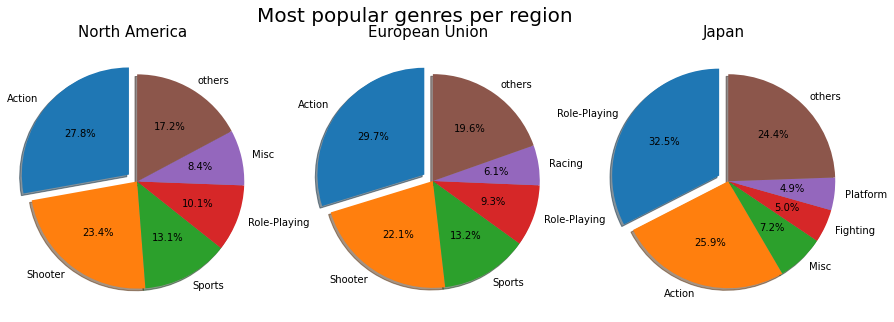

In [77]:
# Plotting 3 pies (ax1, ax2 and ax3) for 3 regions

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) # for 3 canvas

fig.suptitle('Most popular genres per region', fontsize=20) # assigning title

# Pie for NA region
labels = na_genres['genre'] # labling each piece of pie
sizes = na_genres['na_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') # equal aspect ratio makes pie a circle
ax1.set_title('North America', fontsize=15)

# Pie for EU region
labels = eu_genres['genre'] # labling each piece of pie
sizes = eu_genres['eu_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') # equal aspect ratio makes pie a circle
ax2.set_title('European Union', fontsize=15)

# Pie for Japan
labels = jp_genres['genre'] # labling each piece of pie
sizes = jp_genres['jp_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal') # equal aspect ratio makes pie a circle
ax3.set_title('Japan', fontsize=15)


***Graphs observation:***
unsurprisingly North America and Europe prefer actions and shooters followed by sports (probably 'soccer' football). Surprisingly Japan loves role-playing, actions are on the second place.

#### ESRB Ratings by Region

In [78]:
# Identifying ESRB ratings that prevail in North America
na_ratings = data_new.pivot_table(index='rating', values='na_sales', aggfunc=['sum']).reset_index()
na_ratings.columns = ['rating', 'na_total_sales']
na_ratings['na_market_share'] = na_ratings['na_total_sales']/(na_ratings['na_total_sales']).sum()
na_ratings = na_ratings.sort_values(by='na_total_sales', ascending=False).reset_index(drop=True)
na_ratings.head()

others_sales = na_ratings.loc[4:, 'na_total_sales'].sum()
others_share = na_ratings.loc[4:, 'na_market_share'].sum()

na_ratings = na_ratings[0:4].append(
    {'rating':'others', 'na_total_sales':others_sales, 'na_market_share' : others_share}, ignore_index=True
)
na_ratings.head(4)

,rating,na_total_sales,na_market_share
0,M,308.45,0.371309
1,E,170.71,0.205499
2,unknown,123.97,0.149234
3,E10+,117.98,0.142023


In [79]:
# Identifying ESRB ratings that prevail in European Union
eu_ratings = data_new.pivot_table(index='rating', values='eu_sales', aggfunc=['sum']).reset_index()
eu_ratings.columns = ['rating', 'eu_total_sales']
eu_ratings['eu_market_share'] = eu_ratings['eu_total_sales']/(eu_ratings['eu_total_sales']).sum()
eu_ratings = eu_ratings.sort_values(by='eu_total_sales', ascending=False).reset_index(drop=True)
eu_ratings.head()

others_sales = eu_ratings.loc[4:, 'eu_total_sales'].sum()
others_share = eu_ratings.loc[4:, 'eu_market_share'].sum()

eu_ratings = eu_ratings[0:4].append(
    {'rating':'others', 'eu_total_sales':others_sales, 'eu_market_share' : others_share}, ignore_index=True
)
eu_ratings.head(4)

,rating,eu_total_sales,eu_market_share
0,M,250.26,0.373495
1,E,141.75,0.211551
2,unknown,116.61,0.174032
3,T,83.21,0.124185


In [80]:
# Identifying ESRB ratings that prevail in Japan
jp_ratings = data_new.pivot_table(index='rating', values='jp_sales', aggfunc=['sum']).reset_index()
jp_ratings.columns = ['rating', 'jp_total_sales']
jp_ratings['jp_market_share'] = jp_ratings['jp_total_sales']/(jp_ratings['jp_total_sales']).sum()
jp_ratings = jp_ratings.sort_values(by='jp_total_sales', ascending=False).reset_index(drop=True)
jp_ratings.head()

others_sales = jp_ratings.loc[4:, 'jp_total_sales'].sum()
others_share = jp_ratings.loc[4:, 'jp_market_share'].sum()

jp_ratings = jp_ratings[0:4].append(
    {'rating':'others', 'jp_total_sales':others_sales, 'jp_market_share' : others_share}, ignore_index=True
)
jp_ratings.head(4)

,rating,jp_total_sales,jp_market_share
0,unknown,138.26,0.562558
1,E,36.68,0.149245
2,T,33.46,0.136144
3,M,26.14,0.106360


Text(0.5, 1.0, 'Japan')

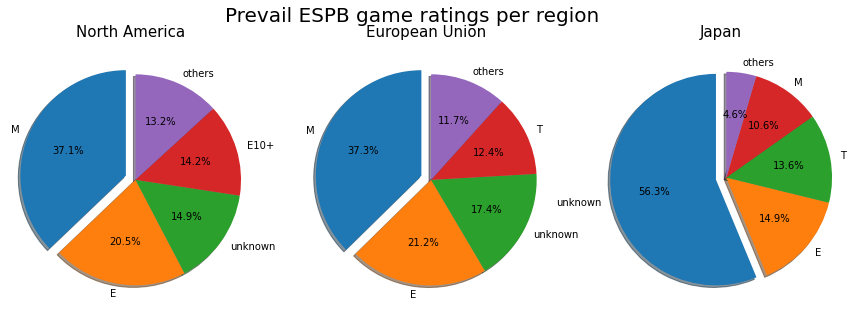

In [81]:
# Plotting 3 pies (ax1, ax2 and ax3) for 3 regions

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) # for 3 canvas

fig.suptitle('Prevail ESPB game ratings per region', fontsize=20) # assigning title

# Pie for NA region
labels = na_ratings['rating'] # labling each piece of pie
sizes = na_ratings['na_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') # equal aspect ratio makes pie a circle
ax1.set_title('North America', fontsize=15)

# Pie for EU region
labels = eu_ratings['rating'] # labling each piece of pie
sizes = eu_ratings['eu_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') # equal aspect ratio makes pie a circle
ax2.set_title('European Union', fontsize=15)

# Pie for Japan
labels = jp_ratings['rating'] # labling each piece of pie
sizes = jp_ratings['jp_market_share'] # sizing each piece of pie
explode = (0.1, 0, 0, 0, 0) # "exploding" (separating) only 1st (the biggest) piece in the pie

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal') # equal aspect ratio makes pie a circle
ax3.set_title('Japan', fontsize=15)


***Graphs observation:***
For the ESRB rating tendencies are almost identical in North America and EU: Mature (17+) games sales are close to 40% of the market. Games for everyone are the second with a bit over 20% of all sales. We also observe a significant percentage of unknown rating data: almost 15% for North America and over 17% for EU.
Japan shows completely differenet picture: over half of the data 56.3% is unknown, the biggest known slice about 15% is for games for everyone. Mature rating, which dominates in North America and EU, in Japan represented with only 10.6%.

**Section conclusion:**

Due to the availability of only ESRB rating data sourse, the results of studying the general the typical user behaviour of every region are as follows:

- North America: majority of mature 17+ gamers playing action games on their X360 platforms;

- EU (according to ESRB rating system): majority of mature 17+ gamers playing action games on their PS3 platforms;

- Japan (according to ESRB rating system): majority of known (rated) gamers of all ages playing role-playing games on 3DS platforms.


## Testing Hypotheses

### Average User Ratings of the XOne and PC Platforms are the same.

We set the null hypothesis that two statistical populatins are equal:

- H0: There is no difference between average user ratings of the XOne and PC gaming platforms.

Therefore in the case of of low probability of the H0, the alternative hypothesis will be:

- H1: Average user ratings of the XOne and PC gaming platforms are different.

We set the level of significance of 5%:

- Alpha = 0.05

Conditions of H0 acceptance/rejection:

- If the p-value < alpha, we reject the null hypothesis, otherwise, we fail to reject the null hypothesis.

***Average user ratings for XOne and PC platforms***

In [82]:
# Assigning XOne platform data to the appropriate data sample
x_one_sample = data_new[data_new['platform'] == "XOne"].dropna()['user_score']
print('The average user rating for XOne platform is:', x_one_sample.mean().round(3))
print('The sample contains values:', x_one_sample.value_counts().sum())

The average user rating for XOne platform is: 6.538
The sample contains values: 165


In [83]:
# Assigning PC platform data to the appropriate data sample
pc_sample = data_new[data_new['platform'] == "PC"].dropna()['user_score']
print('The average user rating for PC platform is:', pc_sample.mean().round(3))
print('The sample contains values:', pc_sample.value_counts().sum())

The average user rating for PC platform is: 6.472
The sample contains values: 288


We have two sufficiently large data samples with numerical values only for further testing of hypothesis.

We observe the diffrence between the average user rating: 0.004. We are going to test whether this arythmetical difference has a statistical significance.

***Calculating variances***

In [84]:
# Calculating variance for XOne platform data sample
data = x_one_sample
variance = np.var(data)
print('XOne platform user score data variance is:', variance)

XOne platform user score data variance is: 1.7855118457300279


In [85]:
# Calculating variance for PC platform data sample
data = pc_sample
variance = np.var(data)
print('PC platform user score data variance is:', variance)

PC platform user score data variance is: 2.5120365547839505


Mathematically-vise the calculated variances are not equal, however the difference is not significant enough to state that 'equal_var=False'. The user score data for both platforms distributed close around mean.

***The hypothesis test function***

In [86]:
# Writing a function for probability value testing
def t_test(x_one_sample, pc_sample, alpha=0.05):
    p_value = st.ttest_ind(x_one_sample, pc_sample).pvalue
    print(p_value)
    if p_value < alpha:
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')

In [87]:
# Calling function 
t_test(x_one_sample, pc_sample, alpha=0.05)

0.6497780402343761
We fail to reject the null hypothesis


#### Hypotesis conclusion:

- Based on our testing, we failed to reject the null hypothesis. 

- Therefore we accept the null hypothesis that the average user ratings of the XOne and PC gaming platforms are the same.

### Average User Ratings for the Action and Sports genres are different.

We set the null hypothesis that two statistical populatins are equal:

- H0: There is no difference between average user ratings for the 'action' and 'sports' genres.

Therefore in the case of of low probability of the H0, the alternative hypothesis will be:

- H1: Average user ratings for the 'action' and 'sports' genres are different.

We set the level of significance of 5%:

- Alpha = 0.05

Conditions of H0 acceptance/rejection:

- If the p-value < alpha, we reject the null hypothesis, otherwise, we fail to reject the null hypothesis.

***Average user ratings for Action and Sports genres***

In [88]:
# Assigning Action genre data to the appropriate data sample
action_sample = data_new[data_new['genre'] == "Action"].dropna()['user_score']
print('The average user rating for Action genre:', action_sample.mean().round(2))
print('The sample contains values:', action_sample.value_counts().sum())

The average user rating for Action genre: 6.83
The sample contains values: 564


In [89]:
# Assigning Sports genre data to the appropriate data sample
sports_sample = data_new[data_new['genre'] == "Sports"].dropna()['user_score']
print('The average user rating for Sports genre:', sports_sample.mean().round(2))
print('The sample contains values:', sports_sample.value_counts().sum())

The average user rating for Sports genre: 5.96
The sample contains values: 182


We have two sufficiently large data samples with numerical values only for further testing of hypothesis.

We observe the diffrence between the average user rating: 0.64. We are going to test whether this arythmetical difference has a statistical significance.

***Calculating variances***

In [90]:
# Calculating variance for Action genre data sample
data = action_sample
variance = np.var(data)
print('Action genre user score data variance is:', variance)

Action genre user score data variance is: 1.671057888184699


In [91]:
# Calculating variance for Sports genre data sample
data = sports_sample
variance = np.var(data)
print('Sports genre user score data variance is:', variance)

Sports genre user score data variance is: 1.9549839995169667


Calculated variances are very close to equal, the difference is not significant enough to state that 'equal_var=False'. The user score data for both platforms is closely grouped around their means.

***The hypothesis test function***

In [92]:
# Writing a function for probability value testing
def t_test (sports_sample, action_sample, alpha=0.05):
    p_value = st.ttest_ind(sports_sample, action_sample).pvalue
    print(p_value)
    if p_value < alpha:
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')

In [93]:
# Calling the function
t_test(sports_sample, action_sample, alpha=0.05)

2.3049250344494632e-14
We reject the null hypothesis


#### Hypotesis conclusion:

- Based on our testing, we rejected the null hypothesis. 

- Therefore we accept the alternative hypothesis that the average user ratings for the 'action' and 'sports' genres are different.

## General Conclusion

In this report we have analysed video games and video game platforms sale success dependancy on the user and professional critic reviews, regional users' specifics and ESRB rating preferences. Our main goal was to provide prognosis of the video games/platforms sales in 2017, based on data collected throughout the time period of 1980 - 2016. We also have learned that the ESRB rating system is officially recognized, implemented and used in the three major countries of North America: Canada, Mexico and the United States, thus our rating data for Euripean Union and Japan contains a certain uknown segment and does not represent the regional user's behaviour objectively.

We've observed the initial DataFrame and identified several problems. On the preprocessing stage we've converted all column names to lowercase, changed the value datatypes as appropriate, checked for duplicated data and replaced or filled in the missing values anywhere it was technically possible and logically vindicable. To complete the dataset for further analyses we've calculated and added column with global total sales.

***Conclusions of exploratory data analyses:***

- The number of games released in 20th century (prior 2002) is insignificant. We did not take them into consideration for further prognoses for 2017. Overall the most games in the dataset relesed around 2007-2011.

- The higher positive Z-score for a platform the better platform position on the sales market. This indicates that platforms producers Play Station Co. (all modifications), XBox Co. with its X360 and Nintendo with its Wii are going strong.

- The maximum lifespan of the platform is never over 10 years and there was a significat switch around 2014. Probably the impact was from the the technological revolution in video graphics, release of mobile game applications. The vast majority of the succesful platforms of 2008-2010 faded away by 2016.

- We observed that the active (top popularity and saling success) lifespan of the now existing platforms is about 4 years in average. For the most successful platforms it takes about 2-3 years to appear and reach the top of its popularity, and then another 2-3 years to fade away, therefore in 2016, looking at this diagram we can assume for 2017 the further succesfull rise of PS4 and XOne platforms and final disappearance of PS3, Wii and X360 platforms.

- We have identified the leaders among the platforms: XOne, X360, Wii, PS3, PS4 and 3DS.

- Based on the Pearson correlation coefficient and scatter plots destribution pictures, there is almost no linear connection between sales and user reviews. The connection between the sales and professional reviews is weak.

- Action games are popular and also the most profitable for the producing companies. The highest sales belong to active games (action, shooter, sports). Calm and intellectual genres like strategy and puzzles are less proffitable.

- Japan uses CERO (Computer Entertainment Rating Organization) age-rating system for the video games, thus we found over 50% of unknown age-rating data for this region.
    
- EU uses PEGI (Pan European Game Information) age-rating system for the video games, thus unknown age-rating data for this region is over 17%.

**In general and in accordance only with ESRB age rating system the typical user behaviour of every region is as follows:**
   - North America: majority of mature 17+ gamers playing action games on their X360 platforms;
   - EU: majority of mature 17+ gamers playing action games on their PS3 platforms;
   - Japan: gamers of all ages playing role-playing games on 3DS platforms.

___We've tested the two statistical hypotheses:___

1.  Average User Ratings of the XOne and PC Platforms are the same.

Based on our testing, we failed to reject the null hypothesis.
Therefore we accept the null hypothesis that the average user ratings of the XOne and PC gaming platforms are the same.

2. Average User Ratings of the Action and Sports game genres are the same.

Based on our testing, we rejected the null hypothesis.
___Therefore we accept the alternative hypothesis that the average user ratings for the 'action' and 'sports' genres are different.___

We can conclude:

- that in order to succeed in future sales, video game developers and platform produced companies may cooperate in addoption of the most successful games to the most popular platforms;

- the marketing strategy must be region-oriented, taking the user game/genre/platform preferences into serious considerartion.

We can forecast:

- the platforms based on the newest technologies with better graphycs and 3D visual capabilities that have appeared on the market less than 5 years ago (PS4 of Play Station Co., XOne of Xbox Co. and 3DS of Nintendo Co. will rule on the market in 2017 and beyond.

- the video games developers may succeed in revenues from the active and role-playing genre games adopted for the abovementioned leading platforms. 